# Ch01

## Why use machine learning

Machine learning is great for:

comlex problem/fluctuating environments/large data/no good solution using traditionl method



## Types of Machine Learning Systems

We can classify them in borad categories based on:

- whether or not they are trained with human supervison (supervise, unsupervised, semisupervised, reinforcement)

- whether or not they can incrementally on the fly (online versus batch learning)

- whether they work by simply comparing new data points to known data points, or instead detect patterns in the traning data and build a predictive model, much like scientists do (instance-based versus model-based learning).

## Example 1-1

### Setup: this is to easure this notebook can work well both with python 2 and 3.

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

**Note**

Author's note: This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [9]:

# Define a function
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

I just tweaked the data files here to fetch the files in datasets/lifesat.

[[5.96242338]]


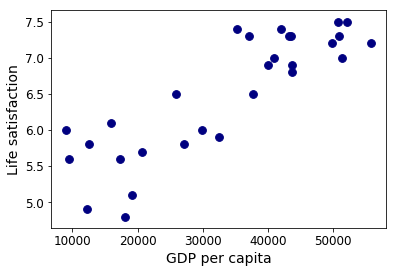

In [42]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import os

# Load the data   thousands : str, default None, 千分位分割符，如“，”或者“."

datapath = os.path.join("datasets", "lifesat", "")
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',
                             delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
xdata = np.c_[country_stats["GDP per capita"]]
ydata = np.c_[country_stats["Life satisfaction"]]

# Visualize the data by scatter
country_stats.plot(kind='scatter', s=60, color='navy',
                   x="GDP per capita", y = "Life satisfaction")

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(xdata, ydata)

# Make a prediction for Cyprus
x_new = [[22587]]  # Cyprus's GDP per capita
print(model.predict(x_new))

In [54]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


### chaning Example 1-1 using instance-based learning

In the following cell, I use $K$-Nearest Neighbours regression model to train the data. It's a widely used instance-based learning algorithm.

In [56]:
# Select a linear model
clf = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
clf.fit(xdata, ydata)

# Make a prediction for Cyprus
x_new = [[22587]]  # Cyprus's GDP per capita
print(clf.predict(x_new))

[[5.76666667]]


### Appendix by Fang for Example 1-1:

numpy.c_

Translates slice objects to concatenation along the second axis.

In [32]:
np.c_[np.array([1,2,3]), np.array([11,12,13])]

array([[ 1, 11],
       [ 2, 12],
       [ 3, 13]])

In [29]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[11,12,13]])]

array([[ 1,  2,  3,  0,  0, 11, 12, 13]])

In [30]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])

If it goes well, our model will make good predictions, however, if it doesn't work well, we need to use more attributes like employment rate, healty, air poluttion, etc, in other words, we need get more data in good quality, or perhaps select a more powerful model like Polynominal Regression model.

**In Summary, a machine learning project usually look like**

1. We stuided the data

2. We slected a model

3. We trained it on the training data (i.e. the learning algorithm searched for the model parameter values that minimize a cost function).

4. Finnaly, we applied the model to make predictions on new cases (this is called $inference$), hoping that this model will generalize well.




## The challenges of Machine Learning

The things may make your machine learning project into a mess is 'bad algorithm' and 'bad data'.

We usually need achive a tradeoff between the data development and spending money and time on algorithm development.

## Data part

#### Insufficient quality of training data

#### Nonrepresentative training data

Check whether your dataset has sampling bias or not. 

#### Poor-quality data

It's often well worth the effort to spend time cleaning up the training data. The truth is most data scientists spend a significant part of their time doing just that. For example:

- If some instances are clearly outliers, it may help to simply discard them or try to fix the errors manually

- If some instances are missing a few features (e.g., 50% of the customers did not specify their age), you msut decide whether you want to ignore this attibute altogether, ignore these instanxes, fill in the missing values (e.g., wthe the median age), or train one model with the feature and one model without it, and so on)

#### Irrelevant Features

including too many irrelevant features will influce machine learning results. Hence, **feature engineering** is quite important, and it usually involves

- Feature selection: choose the most useful features to train on aming existing features

- Feature extraction: combining exsisting featuers to produce a more useful one (dimensionality reduction algorithms can help)

- Creating new features by gathering new data


### Algorithm part

#### Overfitting the traning data

Overfitting: model performs well on the training data, but does not generalize well. This usually happens when the model is highly complex with respect to the amount and noisiness of the training data.

To solve this problem, we have some solutions that we can try:

- To simplify the model 

- To get more good data

- To reduce the noise in the exsiting training data (fix or remove some bad data)


**To simplify a model**, we can use other models instead of it, or we can simplify it by constraining it. The latter (constraining model) is called **regularization**

The amount of regularization to apply during learning can be controlled by a **hyperparameter** which is set before training and will not be influed by the learning algorithm.

#### Underfitting the traning data

Underfitting is the opposite of overfitting: it occurs when your model is too simple to learn the underlying structure of the data.

The iptions to fix underfitting:

- select a more powerful model

- feeding beter features

- reducing the constraints on the model (e.g. reducng the regularization hyperparameter)

#### Stepping back

